In [7]:
import open3d as o3d
import os

In [2]:
pcd = o3d.io.read_point_cloud("LongDress/original.ply")
pcd2 = o3d.io.read_point_cloud("LongDress/colored.ply")
print(pcd)
o3d.visualization.draw_geometries([pcd],point_show_normal=True)

[Open3D WARNING] Read PLY failed: unable to open file: LongDress/colored.ply
PointCloud with 857966 points.


In [3]:
pcd = o3d.io.read_point_cloud("recolored_pcgcv1.ply")
print(pcd)
o3d.visualization.draw_geometries([pcd],point_show_normal=True)

PointCloud with 857600 points.


In [8]:
def showPC(pc_name="longdress",bpp1="original" , bpp2="06",zm=0.8):
    '''
    This function takes as argument the name of the folder containing the point cloud
    and allow to visualize and compare two point clouds
    it also prints the number of points in each file
    '''
    if bpp1=="original" :
        try :
            pcd1 = o3d.io.read_point_cloud(pc_name+"/original.ply")
        except:
            print("file not found") 
            return None
    else :
        try:
            pcd1 = o3d.io.read_point_cloud(pc_name+"/colored"+bpp1+".ply")
        except :
            print("file not found") 
            return None
    try:
        pcd2 = o3d.io.read_point_cloud(pc_name+"/colored"+bpp2+".ply")
    except :
        print("file not found") 
        return None
    vis = o3d.visualization.VisualizerWithEditing()
    vis.create_window(window_name=bpp1, width=600, height=540, left=10, top=30)
    vis.add_geometry(pcd1)
    # vis.add_geometry(point_mesh_sphere)
    o3d.visualization.ViewControl.set_zoom(vis.get_view_control(), zm)
    
    
    vis_result = o3d.visualization.VisualizerWithEditing()
    vis_result.create_window(window_name=bpp2, width=600, height=540, left=810, top=30)
    vis_result.add_geometry(pcd2)
    o3d.visualization.ViewControl.set_zoom(vis_result.get_view_control(), zm)
    
    print(bpp1," has a number of points of : " , pcd1)
    print(bpp2," has a number of points of : " , pcd2)
    while True:
        vis.update_geometry(pcd1)
        if not vis.poll_events():
            break
        vis.update_renderer()

        vis_result.update_geometry(pcd2)
        if not vis_result.poll_events():
            break
        vis_result.update_renderer()
    vis.destroy_window()
    vis_result.destroy_window()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [24]:
showPC("longdress","original","01",0.15)

original  has a number of points of :  PointCloud with 857966 points.
01  has a number of points of :  PointCloud with 857600 points.


In [10]:
pcgcv1 = 857600
original = 857966 
pcc_geo_cnn = np.array([926826 , 885706 , 869969  , 868609  , 863049 ])
bpps = np.array([0.2 , 0.3 , 0.4 , 0.6 , 0.9])
cubic_interploation_model = interp1d(bpps, pcc_geo_cnn, kind = "cubic")
 
# Plotting the Graph
#X_=np.linspace(bpps.min(), bpps.max(), 500)
#Y_=cubic_interploation_model(X_)

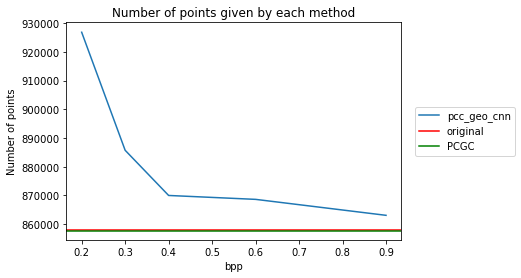

In [11]:
plt.plot(bpps, pcc_geo_cnn,label="pcc_geo_cnn")
plt.axhline(y=857966, color='r', linestyle='-' ,label="original" )
plt.axhline(y=857600, color='g', linestyle='-' ,label="PCGC")
plt.title("Number of points given by each method")
plt.xlabel("bpp")
plt.ylabel("Number of points")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show()